# Your first ML Project
This notebook has been made to help you to go trough, in a really simple way, a machine learning project. In a few minutes you will be able to run your first ML algorithm :-) .

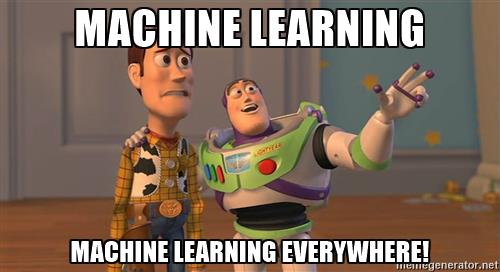

In [1]:
from IPython.display import Image
display(Image('https://raw.githubusercontent.com/anisayari/your_first_machine_learning_project/master/images/machine-learning-everywhere.jpg', width=500, unconfined=True))

### Import all libraries required
* pandas is used for data manipulation (including reading data)
* numpy is used for mathematacial functions
* matplotlib and seaborn are for Data Visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read data
Pandas allow us to read data directly from the file. Here we have a csv file :

In [42]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

## Do you understand what we have to do ?
Here we have to determine if a passenger will survive or not the Titanic tragedy. As you can notice below, the column Survived can only only be two numbers : 1 = Survived , 0 = Died. So it seems to be a classification problem. We will have to keep in mind this information to adapt our exploration and modeling strategy.
In this case, it is a supervised problem, as we have a column of the label that we want to predict.

In [4]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Have a preview of the training dataframe. The training dataframe is made to be able to learn from it, as a development environement.

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Have the preview of the testing dataframe. The testing dataframe is the dataframe that we will have to use to make our prediction in the production environement.

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


You can notice that the column "Survived' is not present in the test dataframe. It's because it is our "label"/"target" column that we will need to predict. :-)

## STEP 1) Data Exploration
The first step of any ML project is to understand your data. Let's do it ! :-)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Knowing the type of your data is important. Some algorithms heavily depend on the type and you may obtain an Error if you use an unadapted type.
Here you can notice that "PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare are numerical columns. And Name, Sex, Ticket,Cabin, Embarked are object columns (in this case, that means strings).

### Trying to find why a person would survive, or not
Do you remember that it is a classification problem ? We will try to find what is different between the two categories of person using the training dataframe.

## Fill empty values
NULL values ? Empty values?
One of the first thing to do is to check for empty cells, that can be a common source of error when your run an algorithm !

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fortunately we made this check ! We got 177 empty values for Age, 687 for Cabin and 2 for Embarked ! You will notice along your data science journey that every dataset has to be clean before use ;) let's deal with those issues.

#### Fill Age

Fill the Age with the mean value to make it not empty. We may do a more sophisticated filling, as for example taking the mean for each Pclass and fill the value based on this feature... you can try to do it !

In [9]:
train.loc[train.Age.isna(), 'Age'] = train[~train.Age.isna()].Age.mean()

#### Fill Cabin

Cabin being empty... Perhaps they do not have a Cabin number ? Let make this assumption !


In [10]:
train.loc[train.Cabin.isna(),'Cabin'] = "No Cabin"

The Embarked feature has only two values empty, it may not really be smart to fill those value with "empty" values that will create a new class and make your future model more complex. 

Let's use the more representative port here, which is S (Southampton).

In [11]:
print(train.Embarked.value_counts())
train.loc[train.Embarked.isna(),'Embarked'] = "S"

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Let's check if all nan value have been filled. Indeed, everything seems okay now :

In [30]:
train.isna().sum()

Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
persons_abroad_size    0
alone                  0
Room                   0
RoomBand               0
dtype: int64

## Outliers
We now need to check for outliers. Outliers are values that are very different compared to what we could expect from all other values.
Here we will try to verify some assumptions. The first one we could make is that older people have more money (and thus a better Class).

We will use a boxplot. What is a boxplot ? Check this link : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

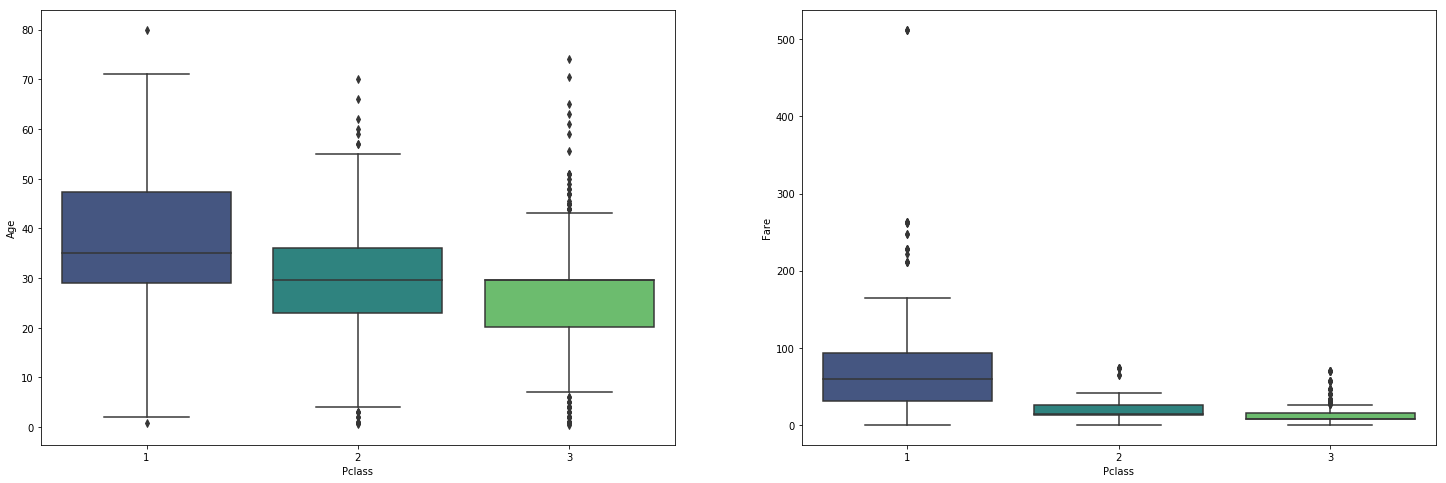

In [51]:
fig,axes = plt.subplots(1, 2,figsize=(25,8))
print(axes)

sns.boxplot(x='Pclass',y='Age',data=train, palette='viridis',ax=axes[0])

# We now need to check for outliers (values that seem irregular compared to the others)
sns.boxplot(x='Pclass',y='Fare',data=train, palette='viridis',ax=axes[1])

plt.show()

It seems that only a few tickets have been really expensive compared to the others ! Let's take a closer look at those.

In [14]:
train.loc[train.Fare > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,No Cabin,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,No Cabin,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S


As we can notice : some have several Cabins, but some not, and they get only one but really expensive Cabin.

Line 258 : Ward Anna seems to have paid 512$ ! As we know in the Titanic some Cabin can be really expensive compared to others - perhaps it was the best Cabin ever made !

Line 679 & Line 737 : We can also notice that Mr Thomas Drake Martinez and Mr Gustance had the same Fare, with the same number Ticket, perhaps they are traveling together ?

You can try to change those outliers Fares, and manage to do some nice modifications ! The idea is to have an intuition about the veracity of the values, and implement it.

## Correlation matrix
A common way to find relationships between variables is to plot a correlation matrix. 
Here you can already see that the Survived feature is higly dependent on the Ticket Class (Pclass), interesting, isn't it ?

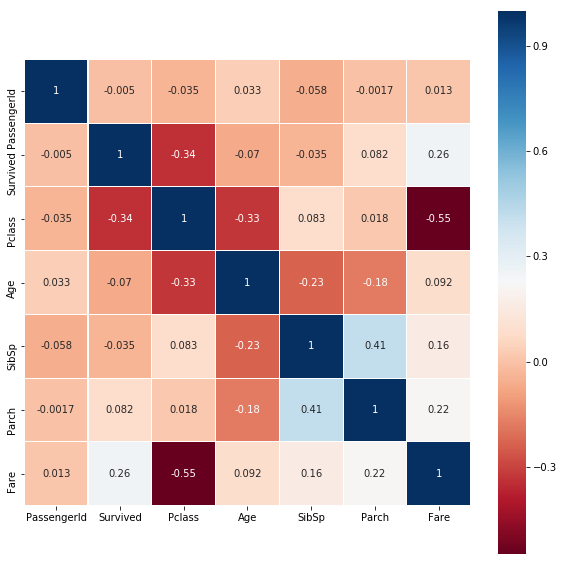

In [15]:

numerical_column = ['int64','float64'] #select only numerical features to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(
    train.select_dtypes(include=numerical_column).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

## Pairplot / scatter matrix
Another comomon thing to do in a Classification is to plot a pair plot, which is a figure that allows you to see the distribution of each data compared to others, in different colors regarding your label column (here Survived). You can already notice the different distribution of Pclass.

It seems that the cheapeast class has a lowest chance of survival... It seems also that people with no parent/child aboard the titanic (regarding Parch) has the highest change to survive... hum... let's keep this in mind this for later.

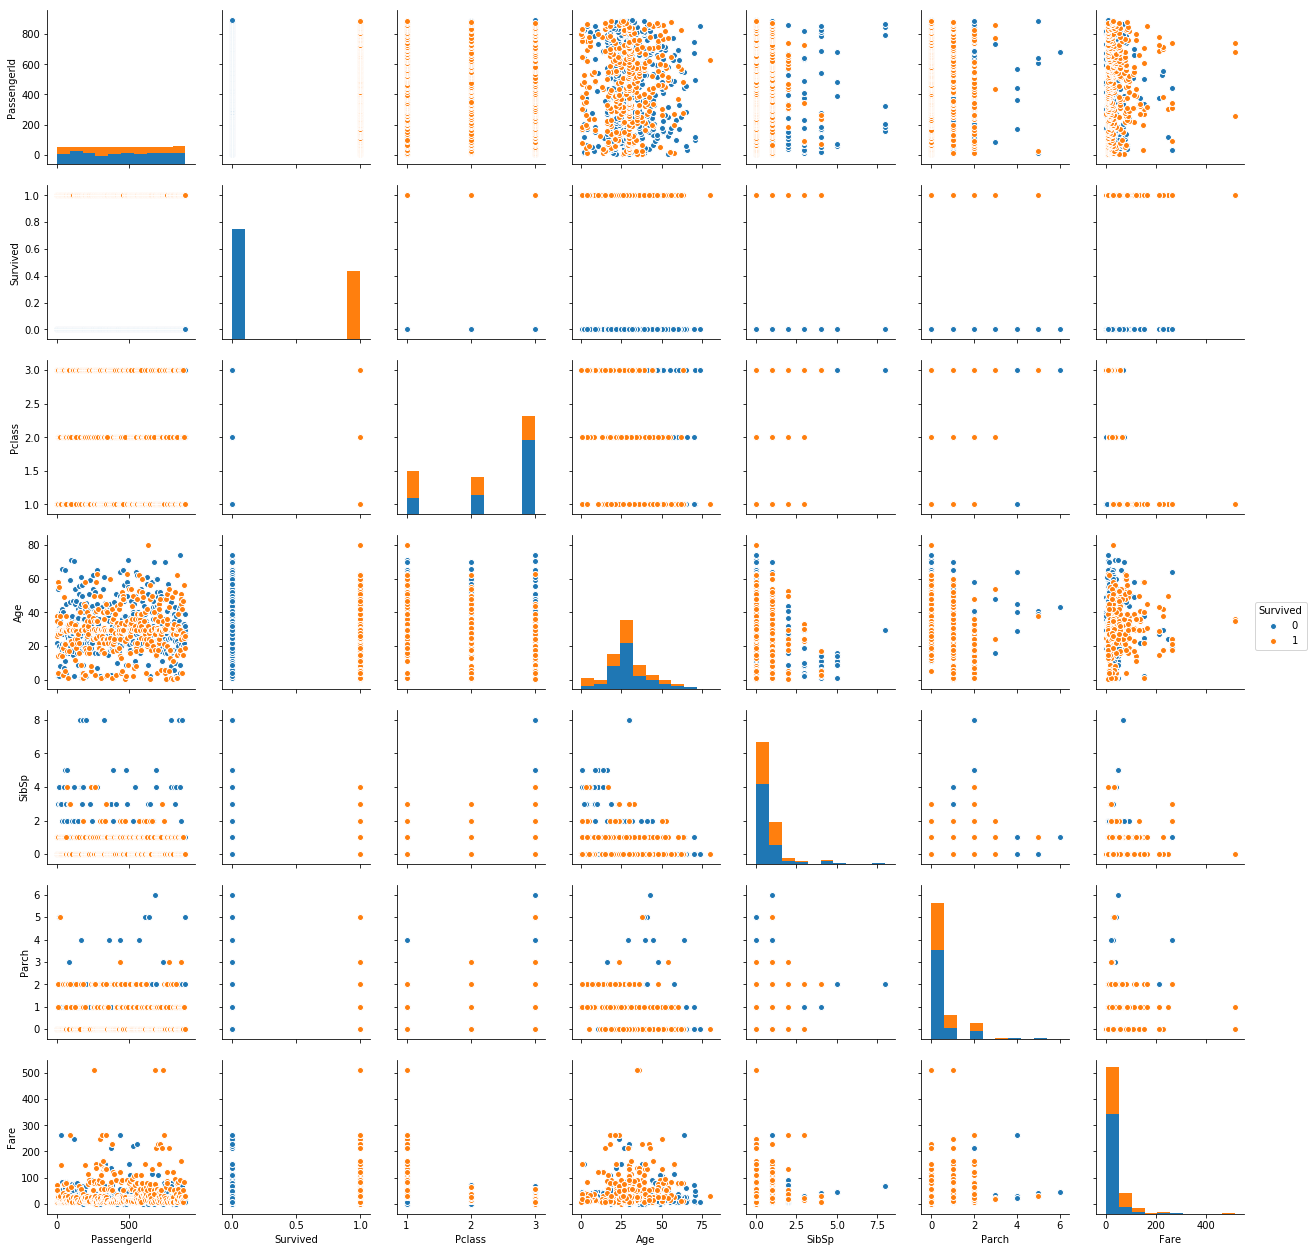

In [16]:
plt.figure(figsize=(10,10))
sns.pairplot(train.select_dtypes(include=numerical_column), hue = 'Survived')

## Few other checks
We can notice, regarding the Age distrubition that children have been (most of the time) saved !
'Save women and children in first' seems at last to really be true... but wait ! We don't have Sex ditrbution here
as it's an object column, and pairplot do not support "object" columns. Let's change that.

In [17]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [52]:
# thanks to the open-source world, we do not need to waste that much time here ! LabelEncore from sckit-learn allow us
# to convert this text categorical data into numbers ! :O

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Sex'] = labelencoder.fit_transform(train['Sex'])
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

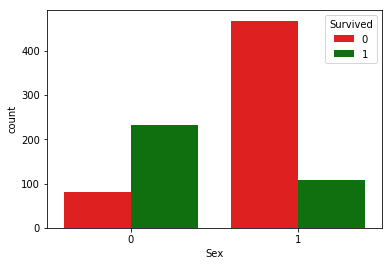

In [19]:
#Let's now print the Age distrubtion regarding who survived

palette ={1:"g", 0:"r"}
sns.countplot(x='Sex',data=train,hue="Survived", palette=palette)

Indeed, our assumption was correct. We can notice that indeed women have a better chance of surviving during this tragedy.

## STEP 2) Features Engineering
This step is made to be able to get a maximum of information from the data, by, for example, creating new columns or changing something in a column as we just already did with the "Sex" column.
I recommend to create a features_engineering function to have a common modification between your "training" and "testing", through just one function :-).

I will be really simple here to give you the opportunity to create and add some new features and test it in your model. Do not forget to add here all features modification you might already have done during the previous step.
### !! Be sure to never include your target/label column in a features engineering process or an error will occur during the feature engineering process of your testing dataframe !!

In [45]:
def features_engineering(df):
    df.loc[df.Age.isna(), 'Age'] = df[~df.Age.isna()].Age.mean()
    df.loc[df.Cabin.isna(),'Cabin'] = "No Cabin"
    df.loc[df.Embarked.isna(),'Embarked'] = "S"
    df['persons_abroad_size'] = (df['Parch']+df['SibSp']).astype(int)
    df['alone'] = np.where(df['Parch']==0,1,0)
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    df['Sex'] = df['Sex'].map( {'male': 1, 'female': 2} ).astype(int)
    df['log_fare'] = df['Fare'].apply(np.log)
    df['Room'] = (df['Cabin']
                    .str.slice(1,5).str.extract('([0-9]+)', expand=False)
                    .fillna(0)
                    .astype(int))
    df['RoomBand'] = 0
    df.loc[(df.Room > 0) & (df.Room <= 20), 'RoomBand'] = 1
    df.loc[(df.Room > 20) & (df.Room <= 40), 'RoomBand'] = 2
    df.loc[(df.Room > 40) & (df.Room <= 80), 'RoomBand'] = 3
    df.loc[df.Room > 80, 'RoomBand'] = 4
    df_id = df.PassengerId
    df = df.drop('PassengerId', axis=1)
    return df,df_id

In [46]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train,train_id = features_engineering(train)
test,test_id = features_engineering(test)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null int64
Age                    891 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  891 non-null object
Embarked               891 non-null int64
persons_abroad_size    891 non-null int64
alone                  891 non-null int64
log_fare               891 non-null float64
Room                   891 non-null int64
RoomBand               891 non-null int64
dtypes: float64(3), int64(10), object(3)
memory usage: 111.5+ KB


## STEP 3) Model and save your prediction
Here we will construct our model. We will use all numerical columns and the XGboost algorithm. XGB is one of the most famous algorithm you may see one the Kaggle platform by its capacity to automatize a large number of process.

In [48]:
import xgboost as xgb
from sklearn import model_selection
X_train = train.drop('Survived',axis=1).select_dtypes(include=['int32','int64','float64'])
y_train = train['Survived']
X_test = test.select_dtypes(include=['int32','int64','float64'])

xg_boost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Train your model with your trained dataset :

In [49]:
xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Here we can do an evaluation of our model :

In [50]:
print(xg_boost.score(X_train, y_train))

scores = model_selection.cross_val_score(xg_boost, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

0.886644219978
[ 0.79888268  0.82122905  0.85393258  0.80898876  0.85875706]
Kfold on XGBClassifier: 0.8284 (+/- 0.0240)


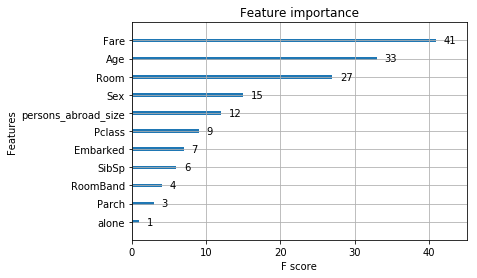

In [26]:
xgb.plot_importance(xg_boost)
plt.show()

82% of accuracy during a cross validation is a correct score for the first shot in a binary classification. Try to improve this ! :) 
Now let's predict our testing value

In [27]:
Y_pred = xg_boost.predict(X_test)

In [28]:
submission = pd.DataFrame({
    "PassengerId": test_id, 
    "Survived": Y_pred 
})
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


Your file predict is ready to be save !  C ongratulations you jsute made your first machine learning project !

In [29]:
submission.to_csv('submission.csv', index=False)